### Exercise #4 - correction

In [4]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
from statsmodels.graphics.gofplots import qqplot

#### Exercise 4.1

Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the presence of Salmo trutta fario (Brown Trout).

Import and clean data

In [5]:
df = pd.read_csv('../exemplos/EFIplus_medit.zip',compression='zip', sep=";")

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [7]:
df2 = df.dropna()

Some possible visualization settings

In [8]:
# Resize figure
# sns.set(rc={'figure.figsize':(8,3)}) # will change the setting for the whole graphs when applied

# Alternative
# from matplotlib import rcParams
# figure size in inches
# rcParams['figure.figsize'] = 8,3

# To restore settings run:
# import matplotlib as mpl
# mpl.rc_file_defaults()

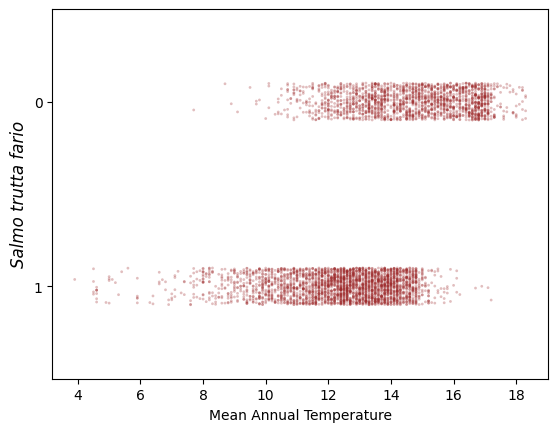

In [9]:
sns.stripplot(data=df, y='Salmo trutta fario', x='temp_ann', orient='h',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the points
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=2, # point size
    )
plt.ylabel('Salmo trutta fario', fontdict={'size': 12, 'style': 'italic'})
plt.xlabel('Mean Annual Temperature')
plt.show()

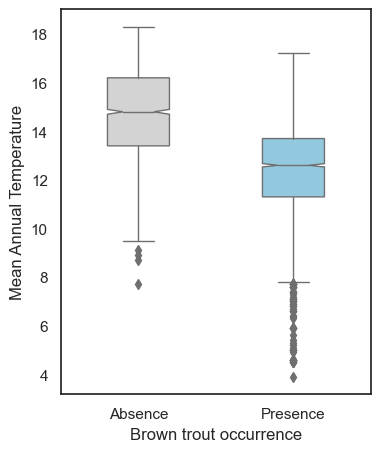

In [10]:
sns.set_theme(rc={'figure.figsize':(4,5)}) # Resize figure
sns.set_style(style='white')

# Create boxplots with a notch
sns.boxplot(data=df, x='Salmo trutta fario', y='temp_ann',
        notch=True,
        palette=['lightgray', 'skyblue'],
        width=0.4,
        linewidth=1,
        ).set_xticklabels(['Absence', 'Presence'])
plt.xlabel('Brown trout occurrence', fontdict={'size': 12})
plt.ylabel('Mean Annual Temperature', fontdict={'size': 12})

plt.show()

In [11]:
# To restore matplotlib settings:
import matplotlib as mpl
mpl.rc_file_defaults()

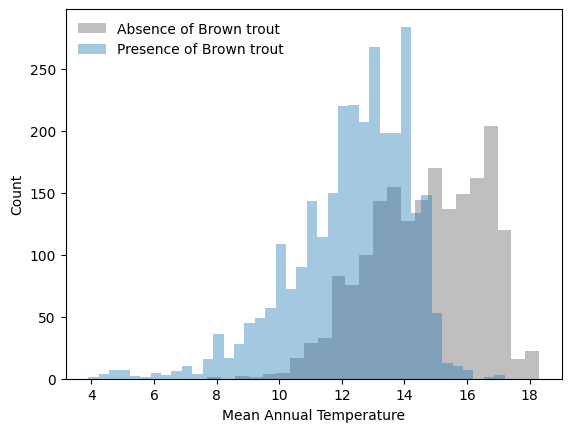

In [12]:

sns.histplot(data=df[df['Salmo trutta fario']==0], x='temp_ann', color='gray', alpha=0.5, edgecolor=None, label="Absence of Brown trout")
sns.histplot(data=df[df['Salmo trutta fario']==1], x='temp_ann', alpha=0.4, edgecolor=None, label="Presence of Brown trout")
plt.legend(frameon=False)
plt.xlabel('Mean Annual Temperature')
plt.show()


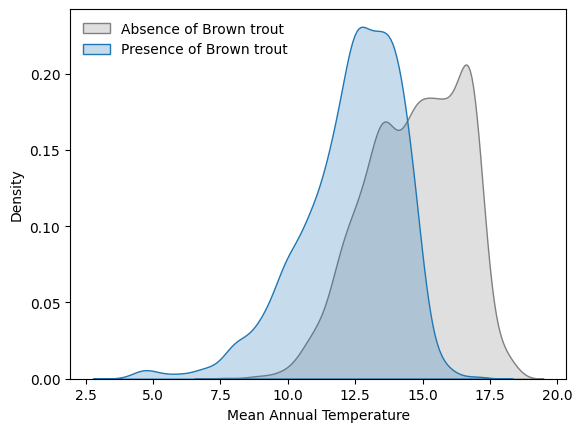

In [13]:
sns.kdeplot(data=df[df['Salmo trutta fario']==0], x='temp_ann', color='gray', fill=True, label="Absence of Brown trout")
sns.kdeplot(data=df[df['Salmo trutta fario']==1], x='temp_ann', fill=True, label="Presence of Brown trout")
plt.legend(frameon=False, loc='upper left')
plt.xlabel('Mean Annual Temperature')
plt.show()

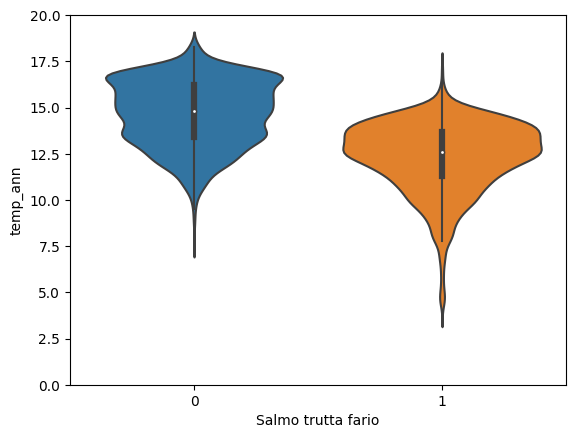

In [14]:
sns.violinplot(data=df, x='Salmo trutta fario', y='temp_ann')
plt.ylim(0, 20)
plt.show()

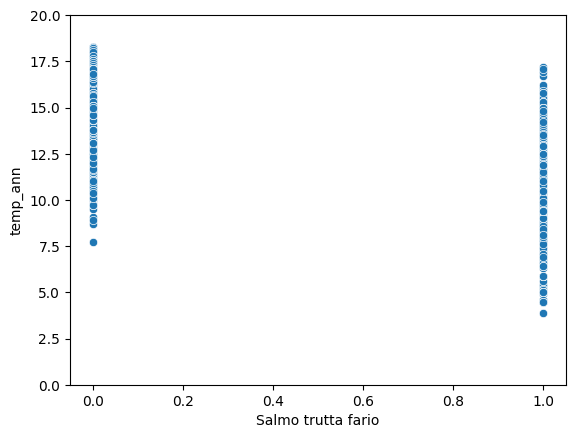

In [15]:
sns.scatterplot(data=df, x='Salmo trutta fario', y='temp_ann')
plt.ylim(0, 20)
plt.show()

#### Exercise 4.2
Check the same effect but now separately for Minho and in the Tagus catchments and comparing the “effect sizes”.


In [28]:
df_selec

[0       False
 1        True
 2        True
 3        True
 4        True
         ...  
 5006    False
 5007    False
 5008    False
 5009    False
 5010    False
 Name: Catchment_name, Length: 5011, dtype: bool]

Text(0, 0.5, 'Mean Annual Temperature')

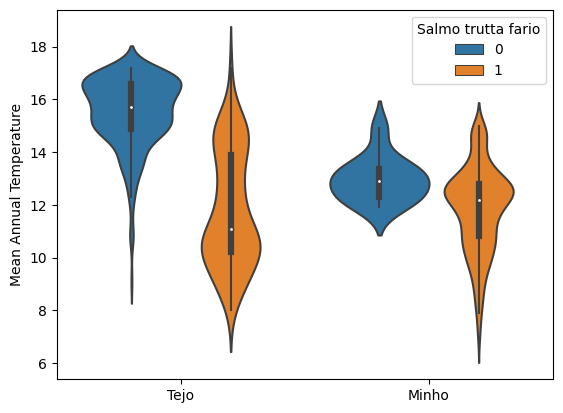

In [36]:
df_selec = df[(df['Catchment_name'] == 'Minho') | (df['Catchment_name'] == 'Tejo')]

sns.violinplot(
    data=df_selec,
    x='Catchment_name',
    y='temp_ann',
    hue='Salmo trutta fario',
)
plt.xlabel('')
plt.ylabel('Mean Annual Temperature')


#### Exercise 4.3
Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a normal distribution.

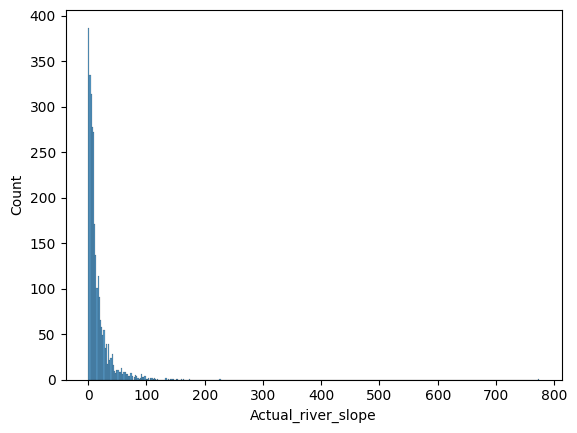

In [16]:
sns.histplot(df2['Actual_river_slope'])
plt.show()

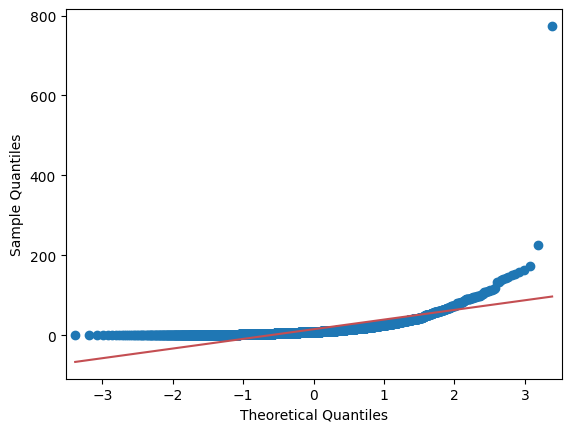

In [17]:
from statsmodels.graphics.gofplots import qqplot

qqplot(pd.Series(df2['Actual_river_slope']), line='s')
plt.show()

In [18]:
# import function
from scipy.stats import shapiro

df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

# normality test
stat, p = shapiro(pd.Series(df2['Actual_river_slope']))
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB
Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


#### Exercise 4.4

Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.


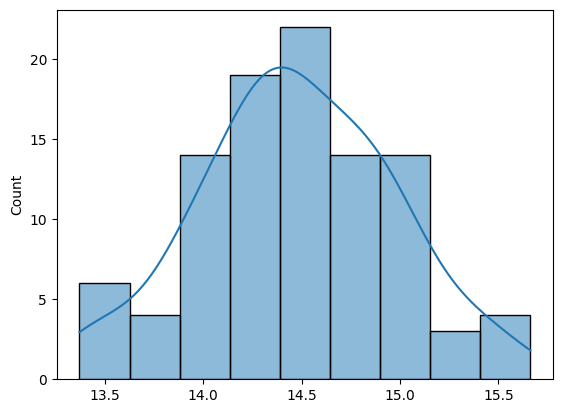

In [19]:
mean = []
for i in range(0,100):
    temp = df['Actual_river_slope']
    sampler = np.random.randint(0, len(temp), 2000) # generate 2000 random integer numbers with replacement to be used as random indices
    sample = temp.take(sampler) # take 2000 random observations from temp
    mean.append(sample.mean())

sns.histplot(mean, kde=True)
plt.show()

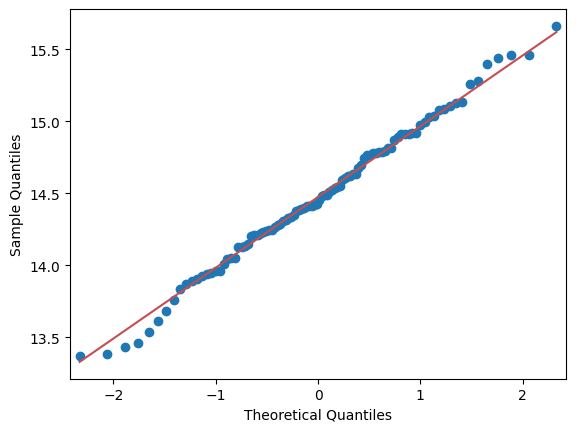

In [20]:
qqplot(pd.Series(mean), line='s')
plt.show()

In [21]:
# import function
from scipy.stats import shapiro
from scipy.stats import kstest

# Shapiro-Wilk normality test 
stat, p = shapiro(mean)
print('Shapiro-Wilk normality test:')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('H0 is not rejected (Rejecting H0 has an error probability >0.05)')
else:
 print('reject H0 (Rejecting H0 has an error probability <0.05)')

Shapiro-Wilk normality test:
Statistics=0.992, p=0.824
H0 is not rejected (Rejecting H0 has an error probability >0.05)
